<a href="https://colab.research.google.com/github/ShinyRyo/matsuoken/blob/master/pymc3_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pythonで作って学ぶ統計モデリング**

- メール：sammy.suyama@gmail.com（須山敦志）
- Twitter：@sammy_suyama

## **更新履歴**
- 2020/03/24 作成

## **実行方法**
画面左上の「Playgroundで開く」を実行することによって，自身のドライブに本Notebookのコピーを作成し，実行することができます．

## **バージョン確認**
下記のバージョンで動作確認済みです．
```
Running on Python v3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Running on numpy v1.18.2
Running on scipy v1.4.1
Running on matplotlib v3.2.0
Running on pandas v0.25.3
Running on theano v1.0.4
Running on pymc3 v3.7
```

下記のコードを実行することによって，現在のバージョンを確認することができます．


In [0]:
import sys
print('Running on Python v{}'.format(sys.version))
import numpy
print('Running on numpy v{}'.format(numpy.__version__))
import matplotlib
print('Running on matplotlib v{}'.format(matplotlib.__version__))
import pymc3
print('Running on pymc3 v{}'.format(pymc3.__version__))

Running on Python v3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Running on numpy v1.18.2
Running on matplotlib v3.2.0
Running on pymc3 v3.7


## **PyMC3による線形回帰**

In [0]:
# ライブラリの読み込み
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

(0.0, 10.0)

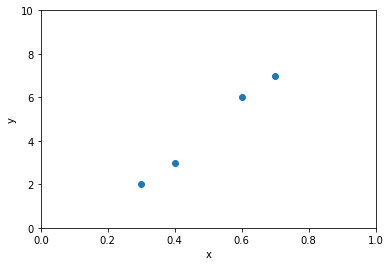

In [0]:
# データ
X = [0.3,0.4,0.6,0.7]
Y = [2,3,6,7]

# 散布図で可視化
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([0,10])

In [0]:
# 線形回帰モデルの設計
with pm.Model() as model_linear:
  pm_a = pm.Normal('pm_a', mu=0.0, sd=10.0)
  pm_b = pm.Normal('pm_b', mu=0.0, sd=10.0)
  pm_Y = pm.Normal('pm_Y', mu=pm_a * X + pm_b, sd=1.0, observed=Y)

Text(0, 0.5, 'y')

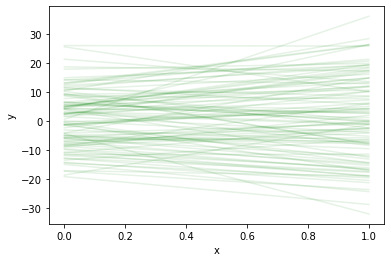

In [0]:
# 設計したモデルをチェック
with model_linear:
   prior_samples = pm.sample_prior_predictive(100)
X_range = np.linspace(0,1, 1000)
for i in range(100):
    plt.plot(X_range, [prior_samples['pm_a'][i]*x + prior_samples['pm_b'][i] for x in X_range], 'g-', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')


## **MCMCの実行**

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [pm_b, pm_a]
100%|██████████| 600/600 [00:00<00:00, 992.45it/s] 
The number of effective samples is smaller than 25% for some parameters.


Text(0.5, 1.0, 'linear regression')

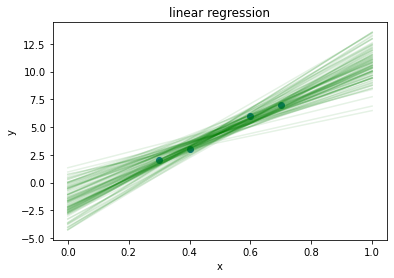

In [0]:
# MCMC（数秒かかります）
with model_linear:
   posterior_samples = pm.sample(100)

# 予測を可視化
X_range = np.linspace(0, 1, 1000)
plt.figure()
for i in range(100):
  plt.plot(X_range, [posterior_samples['pm_a'][i] * x + posterior_samples['pm_b'][i] for x in X_range], 'g-', alpha=0.1)

plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression')

## **モデル拡張の例１：シグモイド関数による予測**

(0.0, 10.0)

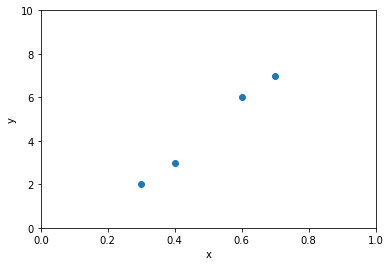

In [0]:
# データ
X = [0.3,0.4,0.6,0.7]
Y = [2,3,6,7]

# 散布図で可視化
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([0,10])

In [0]:
# シグモイド関数の定義
def sigmoid(x, a, b, c, d):
  return c * 1.0/(1.0 + np.exp(a * x + b)) + d

# モデルの設計
with pm.Model() as model_sigmoid:
  pm_a = pm.Normal('pm_a', mu=0.0, sd=10.0)
  pm_b = pm.Normal('pm_b', mu=0.0, sd=10.0)
  pm_c = pm.Normal('pm_c', mu=0.0, sd=10.0)
  pm_d = pm.Normal('pm_d', mu=0.0, sd=10.0)
  pm_Y = pm.Normal('pm_Y', mu=sigmoid(X, pm_a, pm_b, pm_c, pm_d), sd=1.0, observed=Y)


Text(0, 0.5, 'y')

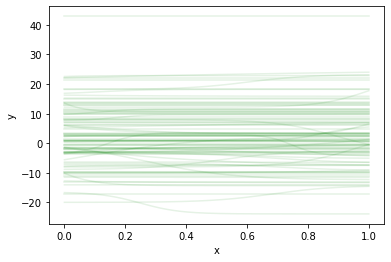

In [0]:
# モデルの可視化
with model_sigmoid:
  prior_samples = pm.sample_prior_predictive(100)
X_range = np.linspace(0,1, 1000)

for i in range(100):
    plt.plot(X_range, [sigmoid(x, prior_samples['pm_a'][i], prior_samples['pm_b'][i],
                             prior_samples['pm_c'][i], prior_samples['pm_d'][i]) for x in X_range], 'g-', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [pm_d, pm_c, pm_b, pm_a]
100%|██████████| 600/600 [00:02<00:00, 285.58it/s]
The acceptance probability does not match the target. It is 0.4937534456666016, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5045150424094541, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


Text(0.5, 1.0, 'sigmoid regression')

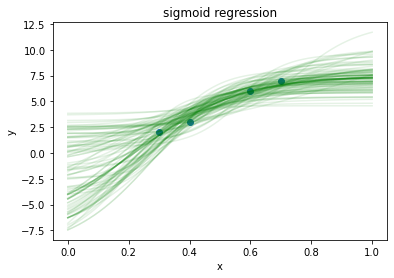

In [0]:
# MCMCの実行
with model_sigmoid:
   posterior_samples = pm.sample(100)

# 予測の可視化
X_range = np.linspace(0, 1, 1000)
plt.figure()
for i in range(100):
  plt.plot(X_range, [sigmoid(x, posterior_samples['pm_a'][i], posterior_samples['pm_b'][i],
                             posterior_samples['pm_c'][i], posterior_samples['pm_d'][i]) for x in X_range], 'g-', alpha=0.1)

plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid regression')


## **モデル拡張の例２：混合モデルによる予測**

(0.0, 10.0)

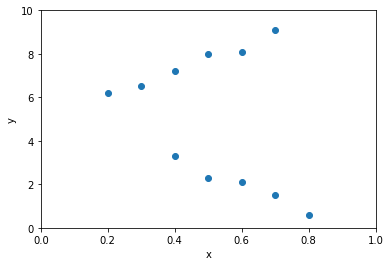

In [0]:
# データ
X = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.4, 0.5, 0.6, 0.7, 0.8]
Y = [6.2, 6.5, 7.2, 8.0, 8.1, 9.1, 3.3, 2.3, 2.1, 1.5, 0.6]

# 散布図で可視化
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([0,10])

In [0]:
# モデルの設計
with pm.Model() as model_mixture:
  pm_a = pm.Normal('pm_a', mu=0.0, sd=10.0, shape=2)
  pm_b = pm.Normal('pm_b', mu=0.0, sd=10.0, shape=2)
  pm_z = pm.Bernoulli('pm_z', p=0.5, shape=len(X))
  pm_Y = pm.Normal('pm_Y', mu=pm_a[pm_z] * X + pm_b[pm_z], sd=1.0, observed=Y)
  prior_samples = pm.sample_prior_predictive(100)

Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [pm_b, pm_a]
>BinaryGibbsMetropolis: [pm_z]
100%|██████████| 600/600 [00:01<00:00, 468.80it/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


Text(0.5, 1.0, 'mixture regression')

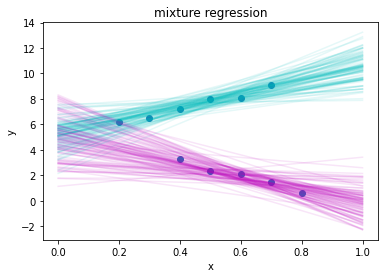

In [0]:
# MCMCの実行
with model_mixture:
   posterior_samples = pm.sample(100)

# 予測の可視化
X_range = np.linspace(0, 1, 1000)
plt.figure()
for i in range(100):
  plt.plot(X_range, [posterior_samples['pm_a'][i][0] * x + posterior_samples['pm_b'][i][0] for x in X_range], 'c-', alpha=0.1)
  plt.plot(X_range, [posterior_samples['pm_a'][i][1] * x + posterior_samples['pm_b'][i][1] for x in X_range], 'm-', alpha=0.1)

plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('mixture regression')